<a href="https://colab.research.google.com/github/polrgn/biomedical_clustering_topic_modeling/blob/main/5_similarity_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.metrics import pairwise
import seaborn as sns
from matplotlib import pyplot as plt
import textwrap

Mount Google drive

In [ ]:
# Mounting Google drive where we save our data and embeddings
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


We read the data

In [ ]:
km_centers = np.load("drive/MyDrive/Projet MedML/Outputs/km_mv_clusters_centers.npy")
pw_dist_abstracts = pd.read_csv('drive/MyDrive/Projet MedML/Outputs/pw_dist_abstracts.csv',index_col=0)
abstract_df = pd.read_csv('drive/MyDrive/Projet MedML/Outputs/abstract_df_clean_stopwords_lang_abstrlen.csv',index_col=0)[0:10000]
projection_df = pd.read_csv('drive/MyDrive/Projet MedML/Outputs/mvmds_projection.csv',index_col=0)[0:10000]
projection_df.index = projection_df.index.astype('int64')
topic_mvmds = pd.read_csv("drive/MyDrive/Projet MedML/Outputs/mvmds_topics.csv",index_col=0)

We build a function to find for a given abstract, the closest other abstracts, topics and cluster centroids

In [ ]:
def get_closest_abstract_topic_cluster(cord_uid):
  closest_abstracts = pw_dist_abstracts[cord_uid].sort_values(ascending=True)[1:20].index.values.tolist()
  closest_abstracts = abstract_df[abstract_df.cord_uid.isin(closest_abstracts)][['cord_uid','abstract']]
  print('Closest abstracts\n',closest_abstracts.iloc[0:5],'\n')

  mvmds_abstract = projection_df[0:10000].loc[abstract_df['cord_uid']==cord_uid].drop('cluster',axis=1)
  dist_clust = pd.DataFrame(pairwise.euclidean_distances(km_centers,mvmds_abstract))
  dist_clust.columns = ['distance_to_center']
  dist_clust['cluster'] = ['0','1','2','3','4','5','6','7','8','9'] 
  dist_clust = dist_clust.sort_values(ascending = True, by = 'distance_to_center')[['cluster','distance_to_center']]
  print('Closest clusters\n',dist_clust.iloc[0:5],'\n')

  mvmds_abstract = projection_df[0:10000].loc[abstract_df['cord_uid']==cord_uid].drop('cluster',axis=1)
  dist_topic = pd.DataFrame(pairwise.euclidean_distances(topic_mvmds,mvmds_abstract))
  dist_topic.columns = ['distance_to_topic']
  dist_topic['topic'] = ['1','2','3','4','4','6','7','8','9','10'] 
  dist_topic = dist_topic.sort_values(ascending = True, by = 'distance_to_topic')[['topic','distance_to_topic']]
  print('Closest topics\n',dist_topic.iloc[0:5])

  return closest_abstracts, dist_clust, dist_topic 

Example with abstract with CORD UI 'sng9h1kq'

In [ ]:
string = abstract_df[abstract_df['cord_uid']=='sng9h1kq']['abstract'].iloc[0]
print(textwrap.fill(string, 80),'\n')
closest_abstracts, distance_clust, distance_topics = get_closest_abstract_topic_cluster('sng9h1kq')

challenging find genes stable transcripts reference genes quantitative realtime
polymerase chain reaction qrt pcr autographa californica nucleopolyhedrovirus
acmnpv known globally shut host gene transcription sf21 modify cytoskeletons
host genes selected validation references gene expression experiments qrt pcr
ecdysoneless ecd myosin stable rna levels previous microarray hpi genes hpi ecd
actin tubulin glyceraldehyde 3-phosphate dehydrogenase gapdh 28s ribosome 28s
commonly employed reference genes qrt pcr ribosomal l35 l35 gene selected test
ribosomal genes stable rna transcript levels similar 28s 18s rrna validate
microarray addition 28s previously known stable transcript levels qrt pcr ecd
transcript levels remained constant course acmnpv transcripts cytoskeleton genes
actin tubulin myosin declined dramatically progressed gapdh l35 transcripts
declined ecd reliable reference gene qrt pcr experiments acmnpv spodoptera
frugiperda 28s reference gene experiments useful ecd abundance di

Example with abstract with CORD UI 'ygg093ns'

In [ ]:
string = abstract_df[abstract_df['cord_uid']=='ygg093ns']['abstract'].iloc[0]
print(textwrap.fill(string, 80),'\n')
closest_abstracts, distance_clust, distance_topics = get_closest_abstract_topic_cluster('ygg093ns')

influenza poses threat children schools play critical role community
mathematical models assumptions contact rates patterns students level temporal
granularity required produce reliable unclear collected contact students aged
5–14 elementary school middle school state utah usa paired influenza
transmission schools simulations produced school transmission averages
consistent published estimates simulated resolution dynamic network simulations
networks averaged representations contact timing duration schools averaging
timing contacts school days caused average sizes increase 1–8 averaging contact
timing pairwise contact durations caused average sizes increase middle school
elementary school averaging contact durations separately class class contacts
reduced increase elementary school effect ignoring details contact timing
duration school contact networks size modelling vary schools 

Closest abstracts
         cord_uid                                           abstract
154886  tqqlr4zx  

We build a distance matrix between cluster centroids and topics.

In [ ]:
dist_topic_cluster_center = pd.DataFrame(pairwise.euclidean_distances(topic_mvmds,km_centers))
dist_topic_cluster_center.index.name = 'topic'
dist_topic_cluster_center.columns.name = 'cluster'
dist_topic_cluster_center

cluster,0,1,2,3,4,5,6,7,8,9
topic,,,,,,,,,,
0,0.057766,0.061018,0.057989,0.058037,0.059320,0.053186,0.030302,0.055298,0.056715,0.062290
1,0.050576,0.058777,0.051815,0.023873,0.051419,0.053867,0.051542,0.047638,0.051901,0.052193
2,0.026640,0.058894,0.052436,0.049389,0.050609,0.053665,0.052573,0.048132,0.030774,0.047986
3,0.061395,0.077290,0.067781,0.069605,0.067850,0.068852,0.068245,0.066930,0.078520,0.056589
4,0.062392,0.067573,0.054098,0.062030,0.063703,0.034986,0.063295,0.061394,0.063712,0.060440
5,0.059689,0.061448,0.053458,0.046643,0.049610,0.053697,0.053875,0.051459,0.047132,0.054923
6,0.049016,0.053661,0.034500,0.050125,0.048299,0.047978,0.047687,0.027814,0.050045,0.048966
7,0.065389,0.069014,0.066577,0.062401,0.062109,0.061901,0.062854,0.059326,0.062842,0.041652
8,0.078150,0.044299,0.081629,0.079664,0.079392,0.080409,0.082964,0.076968,0.081684,0.080806


In [ ]:
dist_topic_cluster_center.to_csv('drive/MyDrive/Projet MedML/Outputs/topic_cluster_distances.csv')

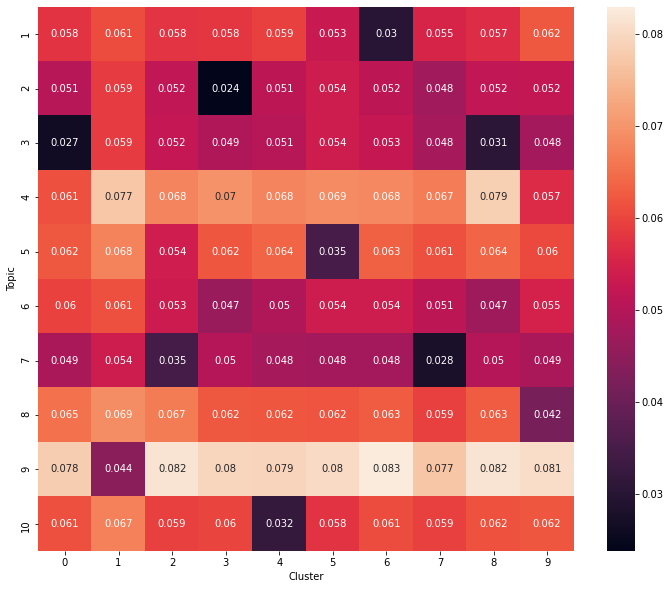

In [ ]:
dist_topic_cluster_center = pd.read_csv('drive/MyDrive/Projet MedML/Outputs/topic_cluster_distances.csv',index_col=0)
dist_topic_cluster_center.index = ['1','2','3','4','5','6','7','8','9','10']
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(dist_topic_cluster_center,ax = ax,annot=True)
ax.set(ylabel='Topic')
ax.set(xlabel='Cluster')
ax.get_figure().savefig("drive/MyDrive/Projet MedML/Images/cluster_topic_heatmap.png")